#  Applied Machine Learning 

## Homework 1: Programming with Python  



### About this assignment:
The main purpose of this assignment is to check whether your programming knowledge is adequate to take CPSC 330. This assignment covers two python packages, `numpy` and `pandas`, which we'll be using throughout the course. For some of you, Python/numpy/pandas will be familiar; for others, it will be new. Either way, if you find this assignment very difficult then that could be a sign that you will struggle later on in the course. While CPSC 330 is a machine learning course rather than a programming course, programming will be an essential part of it.

Also, as part of this assignment you will likely need to consult the documentation for various Python packages we're using. This is, of course, totally OK and in fact strongly encouraged. Reading and interpreting documentation is an important skill, and in fact is one of the skills this assignment is meant to assess. For Python refresher, check out [Python notes](https://ubc-cs.github.io/cpsc330/docs/python_notes.html) and [Python resources](https://ubc-cs.github.io/cpsc330/docs/resources.html#python-resources). 

### Set-up

In order to do this assignment, you will need to set up the CPSC 330 software stack, which is Python and Jupyter. For software install help, see [here](https://ubc-cs.github.io/cpsc330/docs/setup.html). One you have the software stack installed, you should be able to run the next cell, which imports some packages needed for the assignment.

Imports
------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Points
------

Each question or sub-question will have a number of points allocated to it, which is indicated right below the question name. 

<br><br>

## Exercise 1: Loading files with Pandas
rubric={points:12}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the "data" folder in this homework repository there are 6 different .csv files named `wine_#.csv/.txt`. Look at each of these files and use `pd.read_csv()` to load these data so that they resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Colour | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types - try checking `df.index`, `df.columns`, or `df.info()`.

In [2]:
df1 = pd.read_csv("wine_1.csv")
df2 = pd.read_csv("wine_2.csv")
df3 = pd.read_csv("wine_3.csv")
df4 = pd.read_csv("wine_4.txt",sep="\t")
df5 = pd.read_csv("wine_5.csv")
df6 = pd.read_csv("wine_6.txt",sep="\t")

In [3]:
df1

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


##### we have to make all dataframe equals to df1

In [4]:
# start with df2
df2

,My wine diary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
1,1,Chardonnay,Australia,14.23,3.51,White,Floral
2,2,Pinot Grigio,Italy,13.2,3.3,White,Fruity
3,3,Pinot Blanc,France,13.16,3.16,White,Citrus
4,4,Shiraz,Chile,14.91,3.39,Red,Berry
5,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [5]:
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:].reset_index(drop=True)
df2 = df2.astype({'Bottle':'int64','Alcohol':'float','pH':'float'})
# df2[["Alcohol","pH"]] = df2[["Alcohol","pH"]].astype(float)
df2

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bottle   5 non-null      int64  
 1   Grape    5 non-null      object 
 2   Origin   5 non-null      object 
 3   Alcohol  5 non-null      float64
 4   pH       5 non-null      float64
 5   Colour   5 non-null      object 
 6   Aroma    5 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 408.0+ bytes


In [7]:
# dataframe 3
df3

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity
5,"Data entered 1 January, 2010",NaN,NaN,NaN,NaN,NaN,NaN
6,Entered by John Smith,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df3 = df3.iloc[:5]
df3 = df3.astype({'Bottle':'int64'})
df3

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [9]:
# dataframe 4
df4

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [10]:
# dataframe 5
df5

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma,Add more columns
0,1,Chardonnay,Australia,14.23,3.51,White,Floral,NaN
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity,NaN
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus,NaN
3,4,Shiraz,Chile,14.91,3.39,Red,Berry,NaN
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity,NaN


In [11]:
df5 = df5.drop("Add more columns",axis=1)
df5

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [12]:
# dataframe 6
df6

,Unnamed: 0,R,O,W,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,C,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma,NaN,NaN
1,O,1,Chardonnay,Australia,14.23,3.51,White,Floral,NaN,NaN
2,L,2,Pinot Grigio,Italy,13.2,3.3,White,Fruity,NaN,NaN
3,U,3,Pinot Blanc,France,13.16,3.16,White,Citrus,NaN,NaN
4,M,4,Shiraz,Chile,14.91,3.39,Red,Berry,NaN,NaN
5,N,5,Malbec,Argentina,13.83,3.28,Red,Fruity,fhbshvfjsk,NaN
6,NaN,"Data entered 1 January, 2010",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Entered by John Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df6 = df6.drop(["Unnamed: 0","Unnamed: 8","Unnamed: 9"],axis = 1)
df6 = df6.iloc[:6,:]
df6.columns = df6.iloc[0]
df6 = df6.iloc[1:].reset_index(drop=True)
df6 = df6.astype({'Bottle':'int64','Alcohol':'float','pH':'float'})
df6

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [14]:
for i,df in enumerate([df1,df2, df3, df4, df5, df6]):
    print(i)
    print(df.index)
    print(df.columns)
    print(df1.equals(df),end="\n\n")
    print(df.info())

0
RangeIndex(start=0, stop=5, step=1)
Index(['Bottle', 'Grape', 'Origin', 'Alcohol', 'pH', 'Colour', 'Aroma'], dtype='object')
True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bottle   5 non-null      int64  
 1   Grape    5 non-null      object 
 2   Origin   5 non-null      object 
 3   Alcohol  5 non-null      float64
 4   pH       5 non-null      float64
 5   Colour   5 non-null      object 
 6   Aroma    5 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 408.0+ bytes
None
1
RangeIndex(start=0, stop=5, step=1)
Index(['Bottle', 'Grape', 'Origin', 'Alcohol', 'pH', 'Colour', 'Aroma'], dtype='object', name=0)
True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bottle   5 non-null      int64 

In [15]:
for i, df in enumerate([df2, df3, df4, df5, df6]): 
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.")

All tests passed.


In [16]:
df

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


<br><br>

## Exercise 2: The Titanic dataset

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.

#### 2(a)
rubric={points:1}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

In [17]:
titanic_df = pd.read_csv("titanic.csv")

In [18]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


#### 2(b)
rubric={points:2}

The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

In [19]:
titanic_df = titanic_df.rename(columns = {"sibsp":"siblings_spouses","parch":"parents_children"})
titanic_df.head()

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


#### 2(c)
rubric={points:2}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. What type of object is returned?

In [21]:
titanic_df['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

#### 2(d)
rubric={points:2}

Now select the `age` using double bracket notation `[[]]`. What type of object is returned?

In [22]:
titanic_df[['age']]

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


#### 2(e)
rubric={points:1}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

In [23]:
titanic_df[['pclass','survived','age']]

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


#### 2(f)
rubric={points:2}

Use the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [24]:
titanic_df[['name','sex','age']].iloc[:5]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


#### 2(g)
rubric={points:2}

Now use the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [25]:
titanic_df[['name','sex','age']].loc[:4]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


#### 2(h)
rubric={points:2}

How many passengers survived (`survived = 1`) the disaster? Hint: try using `df.query()` or `[]` notation to subset the dataframe and then `df.shape` to check its size.

In [26]:
titanic_df[titanic_df['survived'] == 1].shape

(500, 14)

500 passengers survived the disaster.

#### 2(i)
rubric={points:1}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

In [27]:
titanic_df[(titanic_df['survived'] == 1) & (titanic_df['age'] > 60)].shape

(8, 14)

#### 2(j)
rubric={points:2}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

In [28]:
lowest = min(titanic_df['fare'])
highest = max(titanic_df['fare'])
print(f"lowest fare is {lowest} and highest dfare is {highest}")

lowest fare is 0.0 and highest dfare is 512.3292


#### 2(k)
rubric={points:1}

Sort the dataframe by fare paid (most to least).

In [29]:
titanic_df.sort_values('fare')

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,home.dest
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,NaN,NaN,Belfast
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,C,NaN,Liverpool
1254,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,15,NaN,NaN
896,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN


#### 2(l)
rubric={points:1}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

In [30]:
titanic_df.to_csv("titanic_fares.csv")

#### 2(m)
rubric={points:3}

Create a scatter plot of fare (y-axis) vs. age (x-axis). Make sure to follow the [guidelines on figures](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md#figures). You are welcome to use pandas built-in plotting or `matplotlib`. 

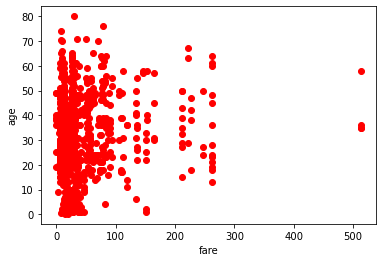

In [31]:
plt.scatter(x="fare",y="age",data=titanic_df,color='red')
plt.xlabel("fare")
plt.ylabel("age")
plt.show()

#### 2(n)
rubric={points:3}

Create a bar plot of `embarked` values. 

> Make sure to name the axes and give a title to your plot. 

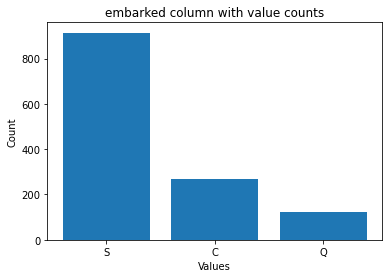

In [32]:
plt.bar(['S','C','Q'],titanic_df['embarked'].value_counts())
plt.title('embarked column with value counts')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

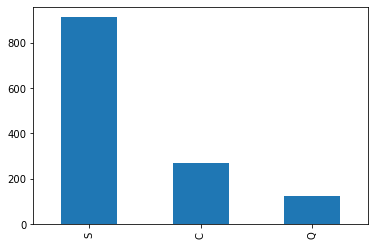

In [33]:
titanic_df['embarked'].value_counts().plot(kind='bar')
plt.show()

<br><br>

## Exercise 3: Treasure Hunt

In this exercise, we will generate various collections of objects either as a list, a tuple, or a dictionary. Your task is to inspect the objects and look for treasure, which in our case is a particular object: **the character "T"**. 

**Your tasks:**

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). 

> Please do not modify the original line of code that generates `x` (though you are welcome to copy it). You are welcome to answer this question "manually" or by writing code - whatever works for you. However, your submission should always end with a line of code that prints out `'T'` at the end (because you've found it). 

In [34]:
import string

letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [35]:
x = ("nothing", {-i: l for i, l in enumerate(letters)})
x

('nothing',
 {0: 'A',
  -1: 'B',
  -2: 'C',
  -3: 'D',
  -4: 'E',
  -5: 'F',
  -6: 'G',
  -7: 'H',
  -8: 'I',
  -9: 'J',
  -10: 'K',
  -11: 'L',
  -12: 'M',
  -13: 'N',
  -14: 'O',
  -15: 'P',
  -16: 'Q',
  -17: 'R',
  -18: 'S',
  -19: 'T',
  -20: 'U',
  -21: 'V',
  -22: 'W',
  -23: 'X',
  -24: 'Y',
  -25: 'Z'})

**Example answer**:

In [36]:
x[1][-19]

'T'

> Note: In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

#### 3(a)
rubric={points:2}

In [37]:
# Do not modify this cell
x = [
    [letters[i] for i in range(26) if i % 2 == 0],
    [letters[i] for i in range(26) if i % 2 == 1],
]
x

[['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O', 'Q', 'S', 'U', 'W', 'Y'],
 ['B', 'D', 'F', 'H', 'J', 'L', 'N', 'P', 'R', 'T', 'V', 'X', 'Z']]

In [38]:
x[1][9]

'T'

#### 3(b)
rubric={points:2}

In [39]:
# Do not modify this cell
import numpy as np
np.random.seed(1)
x = np.random.choice(list(set(letters) - set("T")), size=(100, 26), replace=True)
x[np.random.randint(100), np.random.randint(26)] = "T"
x

array([['D', 'M', 'X', ..., 'U', 'N', 'R'],
       ['R', 'E', 'Z', ..., 'I', 'V', 'Z'],
       ['K', 'N', 'P', ..., 'Q', 'R', 'N'],
       ...,
       ['U', 'N', 'M', ..., 'L', 'S', 'H'],
       ['G', 'D', 'J', ..., 'S', 'K', 'R'],
       ['F', 'Z', 'E', ..., 'W', 'P', 'E']], dtype='<U1')

In [40]:
for i in range(len(x)):
    for j in range(len(x[0])):
        if x[i][j] == 'T':
            print(f'{i}th row and {j}th column')

95th row and 2th column


#### 3(c)
rubric={points:3}

In [41]:
# Do not modify this cell
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {
        string.ascii_lowercase[(j + 1) % n]: [[letters[j]] if j - 2 == i else None]
        for j in range(n)
    }
x

{'a': {'b': [None],
  'c': [None],
  'd': [['C']],
  'e': [None],
  'f': [None],
  'g': [None],
  'h': [None],
  'i': [None],
  'j': [None],
  'k': [None],
  'l': [None],
  'm': [None],
  'n': [None],
  'o': [None],
  'p': [None],
  'q': [None],
  'r': [None],
  's': [None],
  't': [None],
  'u': [None],
  'v': [None],
  'w': [None],
  'x': [None],
  'y': [None],
  'z': [None],
  'a': [None]},
 'b': {'b': [None],
  'c': [None],
  'd': [None],
  'e': [['D']],
  'f': [None],
  'g': [None],
  'h': [None],
  'i': [None],
  'j': [None],
  'k': [None],
  'l': [None],
  'm': [None],
  'n': [None],
  'o': [None],
  'p': [None],
  'q': [None],
  'r': [None],
  's': [None],
  't': [None],
  'u': [None],
  'v': [None],
  'w': [None],
  'x': [None],
  'y': [None],
  'z': [None],
  'a': [None]},
 'c': {'b': [None],
  'c': [None],
  'd': [None],
  'e': [None],
  'f': [['E']],
  'g': [None],
  'h': [None],
  'i': [None],
  'j': [None],
  'k': [None],
  'l': [None],
  'm': [None],
  'n': [None],
  'o'

In [42]:
x1 = pd.DataFrame(x)
x1

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
b,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
c,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
d,[[C]],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
e,[None],[[D]],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
f,[None],[None],[[E]],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
g,[None],[None],[None],[[F]],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
h,[None],[None],[None],[None],[[G]],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
i,[None],[None],[None],[None],[None],[[H]],[None],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
j,[None],[None],[None],[None],[None],[None],[[I]],[None],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]
k,[None],[None],[None],[None],[None],[None],[None],[[J]],[None],[None],...,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None]


In [43]:
x1.index

Index(['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a'],
      dtype='object')

In [44]:
x1['r']['u']

[['T']]

In [45]:
for k,v in x.items():
    for k1,v1 in v.items():
        if ['T'] in v1:
            print(v1)
            print(k)
            print(v)

[['T']]
r
{'b': [None], 'c': [None], 'd': [None], 'e': [None], 'f': [None], 'g': [None], 'h': [None], 'i': [None], 'j': [None], 'k': [None], 'l': [None], 'm': [None], 'n': [None], 'o': [None], 'p': [None], 'q': [None], 'r': [None], 's': [None], 't': [None], 'u': [['T']], 'v': [None], 'w': [None], 'x': [None], 'y': [None], 'z': [None], 'a': [None]}


<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 

![](eva-congrats.png)